# Excercise using CMIP6 LGM output and ice core observations

1. Read in CMIP6 LGM and PD: AWI, INM, MIROC, MPI output
2. Read in ice core values from Werner et al 2018
3. Plot the ice core LGM-PD values on top of the CMIP6 LGM-PD maps
4. Interpolate the CMIP6 LGM-PD model values at the ice core sites
5. Plot a scatter plot of the equivalent CMIP6 model versus ice core value results

In [1]:
#1a. Set up: 
import numpy as np
import pandas as pd
import xarray as xr
import cartopy as ctp
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
warnings.filterwarnings('ignore')
import os
# !!!!!!!! Attention: ensure you change the current working directory to the foler 'finse_school' that contains this git repository and the 'data' folder.
os.chdir('C:/Users/lsim/finse_school')   #apple
# os.chdir('D:/Documents/finse_school')                                                                                          #windows
#os.chdir('/home/callum/Downloads/finse_school')                                                                                #linux
# os.getcwd()

# Then you can import our self defined functions
from Finse_data_analysis.module.mapplot import (
         hemisphere_plot,
         globe_plot,
     )

In [2]:
#1b. Read in CMIP6: AWI, INM, MIROC, MPI  and observed data PD and LGM values 
model_name = ['AWI-ESM-1-1-LR', 'INM-CM4-8', 'MIROC-ES2L', 'MPI-ESM1-2-LR']
stations = ['EDML','DOME F','DOME B','Vostok','Law Dome','EDC','Taylor Dome','Talos','Siple Dome','Byrd','WDC']

pi_simulation = {}
cdo_regridded_pi_simulation = {}
lgm_simulation = {}

for i in range(len(model_name)):
    print(str(i) + '. read in files of Model ' + model_name[i])
    
    pi_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_PI_simulation_year_mean/tas_Amon_' + model_name[i] + '*.nc')
    cdo_regridded_pi_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_PI_simulation_year_mean/cdo_regridded_tas_Amon_' + model_name[i] + '*.nc')
    lgm_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_LGM_simulation_year_mean/tas_Amon_' + model_name[i] + '*.nc')

#era5_t2m = xr.open_dataset('data/ERA5/cdo_regridded_t2m_era5_1979_2020_annual_mean.nc')

# ice core observations - PD to LGM differences:
delta_tas_sites = pd.read_csv('data/Antarctic_site_records/inferred_delta_tas_at_Antarctic_sites_LGM_PD.csv')


0. read in files of Model AWI-ESM-1-1-LR
1. read in files of Model INM-CM4-8
2. read in files of Model MIROC-ES2L
3. read in files of Model MPI-ESM1-2-LR


In [3]:
#1c. Define lon, lat, and tas_diff between PD and LGM
nrow = 2
ncol = 2

for i in range(nrow):
    for j in range(ncol):
        print(str(i) + '-' + str(j) + ': plot ' + model_name[i * 2 + j])
        
        lon = lgm_simulation[model_name[i * 2 + j]].lon,
        lat = lgm_simulation[model_name[i * 2 + j]].lat,
        tas_diff = lgm_simulation[model_name[i * 2 + j]].tas.mean(axis=0) - \
                pi_simulation[model_name[i * 2 + j]].tas.mean(axis=0),
          
print(tas_diff)

0-0: plot AWI-ESM-1-1-LR
0-1: plot INM-CM4-8
1-0: plot MIROC-ES2L
1-1: plot MPI-ESM1-2-LR
(<xarray.DataArray 'tas' (lat: 96, lon: 192)>
dask.array<sub, shape=(96, 192), dtype=float32, chunksize=(96, 192), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
    height   float64 2.0,)


0-0: plot AWI-ESM-1-1-LR
0-1: plot INM-CM4-8
1-0: plot MIROC-ES2L
1-1: plot MPI-ESM1-2-LR


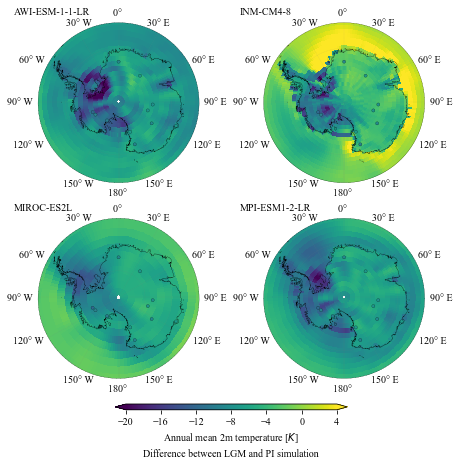

In [4]:
#2. Figure with four panels, one for each model (LGM-PD) with equivalent ice core observations on top

nrow = 2
ncol = 2

# here we define the color bar properties.
pltlevel = np.arange(-20, 4.01, 0.01)
pltticks = np.arange(-20, 4.01, 4)

fig, axs = plt.subplots(
    nrow, ncol, figsize=np.array([8.8*ncol, 9.3*nrow + 2]) / 2.54,
    subplot_kw={'projection': ctp.crs.SouthPolarStereo()},
    gridspec_kw={'hspace': 0.12, 'wspace': 0.4},
    )

for i in range(nrow):
    for j in range(ncol):
        print(str(i) + '-' + str(j) + ': plot ' + model_name[i * 2 + j])
        axs[i, j] = hemisphere_plot(northextent=-60, ax_org = axs[i, j])
        
        plt_cmp = axs[i, j].pcolormesh(
            lgm_simulation[model_name[i * 2 + j]].lon,
            lgm_simulation[model_name[i * 2 + j]].lat,
            lgm_simulation[model_name[i * 2 + j]].tas.mean(axis=0) - \
                pi_simulation[model_name[i * 2 + j]].tas.mean(axis=0),
            norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
            cmap=cm.get_cmap('viridis', len(pltlevel)),
            transform=ctp.crs.PlateCarree(),
        )
        # ax.scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
        plt.plot()

        axs[i, j].scatter(
            x = delta_tas_sites.lon, y = delta_tas_sites.lat,
            s=10, linewidths=0.2,
            c = delta_tas_sites.inferred_delta_tas, marker='o',
            norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
            cmap=cm.get_cmap('viridis', len(pltlevel)),
            transform=ctp.crs.PlateCarree(), edgecolors = 'black',
        )
        
        axs[i, j].text(
            -0.15, 1.05, model_name[i * 2 + j],
            transform=axs[i, j].transAxes)

cbar = fig.colorbar(
    plt_cmp, ax=axs, orientation="horizontal", pad=0.02,
    fraction=0.14, shrink=0.6, aspect=40, anchor=(0.5, 0.7),
    ticks=pltticks, extend='both')
cbar.ax.set_xlabel(
    'Annual mean 2m temperature [$K$]\nDifference between LGM and PI simulation',
    linespacing=1.5
)

plt.savefig('CMIP6_figure_maps.png')


In [5]:
#3. Interpolate model values to ice core sites using neaarest and interpolation

nrow = 2
ncol = 2

model_nearest=np.empty([11,4])
model_interp=np.empty([11,4])

for i in range(nrow):
    for j in range(ncol):
        #print(str(i) + '-' + str(j) + ': plot ' + model_name[i * 2 + j])
        model_num=i * 2 + j
             # printing difference between values fro models and the records from the stations
        for k in range(0,11):
            da = lgm_simulation[model_name[i * 2 + j]].sel(lat=delta_tas_sites.lat[k], lon=delta_tas_sites.lon[k],method='nearest').tas.mean(axis=0)- \
                pi_simulation[model_name[i * 2 + j]].sel(lat=delta_tas_sites.lat[k], lon=delta_tas_sites.lon[k],method='nearest').tas.mean(axis=0)
            #print(stations[k],' ',da.values)
            model_nearest[k,model_num]=da.values
            da_interp = lgm_simulation[model_name[i * 2 + j]].interp(lat=delta_tas_sites.lat[k], lon=delta_tas_sites.lon[k]).tas.mean(axis=0)- \
                pi_simulation[model_name[i * 2 + j]].interp(lat=delta_tas_sites.lat[k], lon=delta_tas_sites.lon[k]).tas.mean(axis=0)
            model_interp[k,model_num]=da_interp.values
       
    #print(model_nearest)
    #print(model_interp)
    


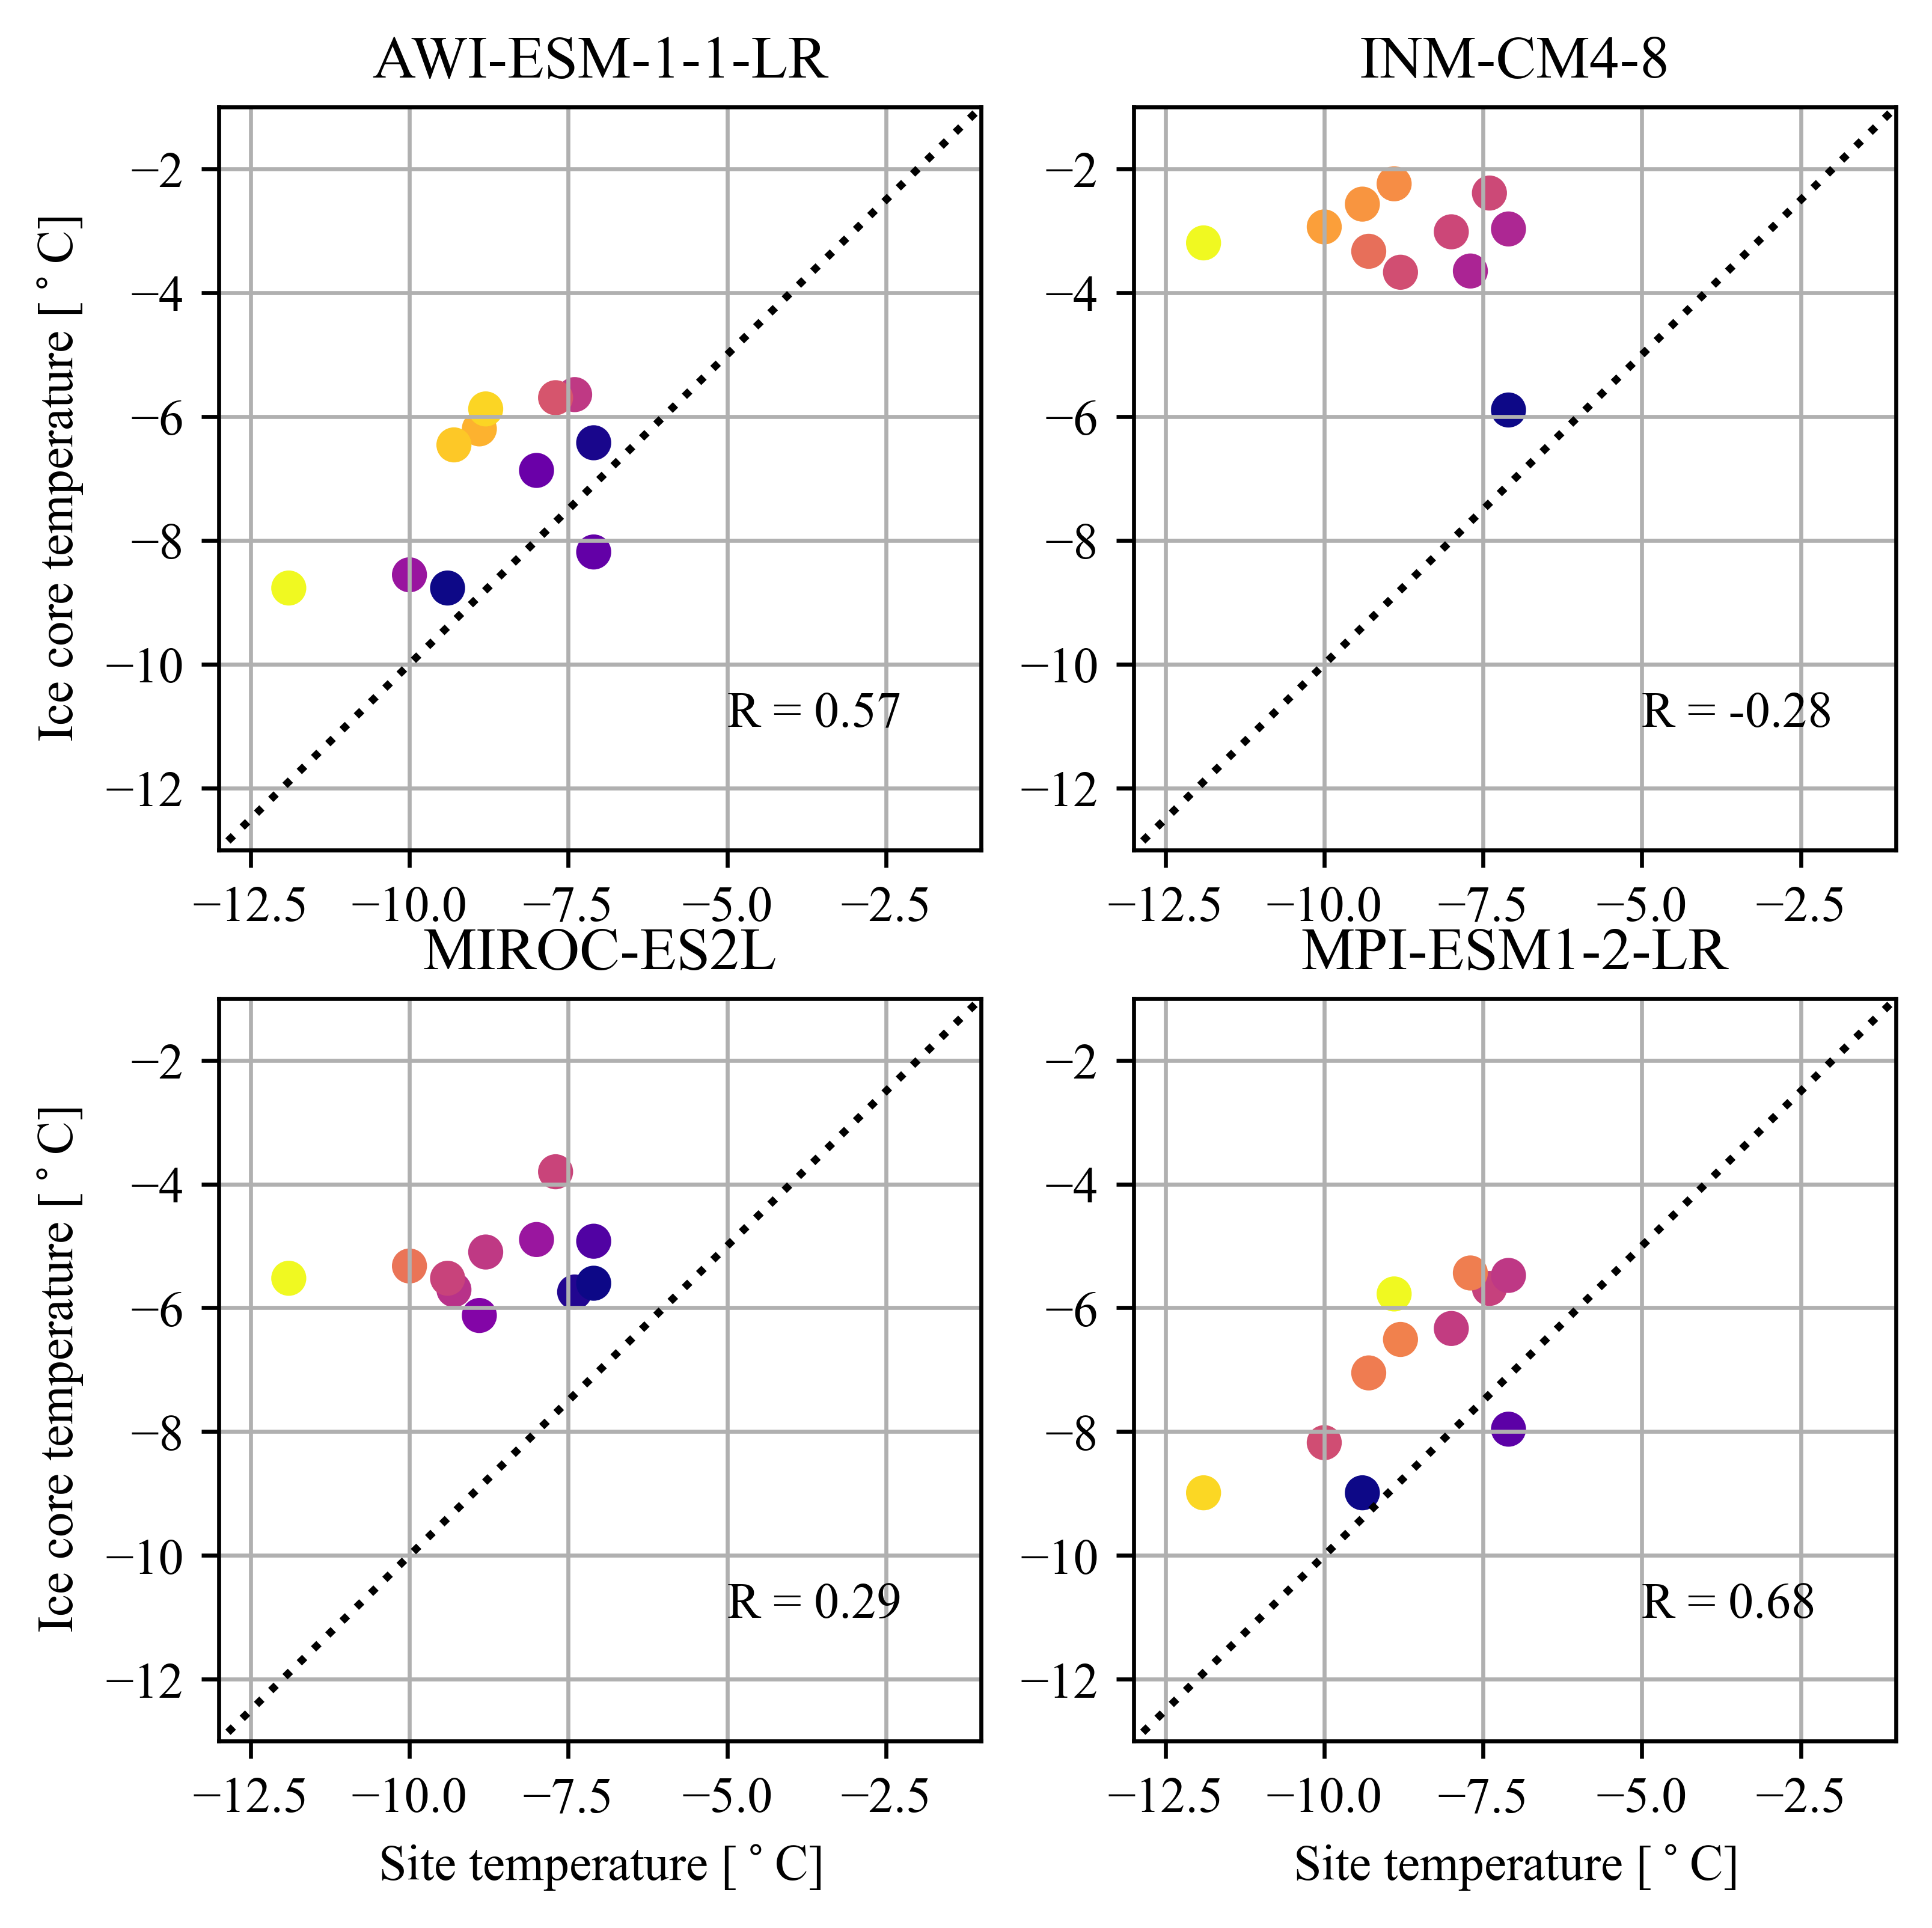

In [8]:
#4. Scatter plots of model  versus ice core  values 

#print(model_nearest)
#print(delta_tas_sites.inferred_delta_tas)
#print(delta_tas_sites)

from matplotlib.pyplot import figure
nrow = 2
ncol = 2
fig, axs = plt.subplots(2,2,figsize=[6,6])

for i in range(nrow):
    for j in range(ncol):
        model_no=i * 2 + j
        obs_value=np.array(delta_tas_sites.inferred_delta_tas)
        model_value=np.array(model_nearest[:,model_no])
        #model_value=np.array(model_interp[:,model_no])
        #print(model_no)
        #print(obs_value)
        #print(model_value)
        C=np.corrcoef(obs_value, model_value)
        C_str=str(round(C[1,0],2))
        #figure(figsize=(8, 6), dpi=80)
        plt.plot()
        axs[i, j].scatter(obs_value, model_value,c = abs((model_value-obs_value)), cmap='plasma')
        axs[i,j].plot([-16,0],[-16,0], 'k:')
        if i == 1:
            axs[i,j].set_xlabel('Site temperature [$^\circ$C]',fontsize=10)
        if j == 0:
            axs[i,j].set_ylabel('Ice core temperature [$^\circ$C]',fontsize=10)
        
        axs[i,j].set_title(model_name[model_no])
        axs[i,j].text(-5,-11,'R = ' + C_str)
        axs[i,j].set_xlim([-13, -1])
        axs[i,j].set_ylim([-13, -1])
        axs[i,j].grid()

plt.savefig('CMIP6_figure_scatter.png')